In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from src.data.loader import DataLoader
from src.pipelines.preprocessing.features.models.neural_network import NeuralNetworkFeaturesPreprocessor
from src.pipelines.preprocessing.targets.models.neural_network import NeuralNetworkTargetPreprocessor
from sklearn.model_selection import train_test_split

In [3]:
data_loader = DataLoader()
data = data_loader.fast_load_villain_showdown_hands()
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222334 entries, 7 to 2251965
Columns: 397 entries, id to river_total_bet_amount_bb
dtypes: bool(148), category(77), datetime64[ns, UTC](1), float16(37), float32(115), float64(5), int64(1), int8(13)
memory usage: 183.6 MB
None


,id,hand_date,max_players,cnt_players,button_seat,tournament_id,ref_tournament_buy_in_total,ref_tournament_speed,ref_tournament_type,total_players_range,...,turn_total_bet_amount_bb,river_amount_effective_stack_bb,river_amount_to_call_facing_1bet_bb,river_amount_to_call_facing_2bet_bb,river_amount_to_call_facing_3bet_bb,river_amount_to_call_facing_4bet_bb,river_amount_bet_made_bb,river_amount_first_raise_made_bb,river_amount_second_raise_made_bb,river_total_bet_amount_bb
7,68022,2018-06-05 13:17:44+00:00,6,6,1,236599248,5.0,REGULAR,KO,1001 - 2000,...,0.00,39.163334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,68018,2018-06-05 13:17:44+00:00,6,6,1,236599248,5.0,REGULAR,KO,1001 - 2000,...,0.00,39.163334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,68031,2018-06-05 13:19:32+00:00,6,6,3,236599248,5.0,REGULAR,KO,1001 - 2000,...,7.15,27.136667,14.3,0.0,0.0,0.0,0.0,0.0,0.0,14.3
21,68030,2018-06-05 13:19:32+00:00,6,6,3,236599248,5.0,REGULAR,KO,1001 - 2000,...,7.15,41.436668,0.0,0.0,0.0,0.0,14.3,0.0,0.0,14.3
31,68046,2018-06-05 13:21:43+00:00,6,6,5,236599248,5.0,REGULAR,KO,1001 - 2000,...,0.00,23.396667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
[c for c in data.columns if 'player_combo' in c]

['player_combo',
 'player_combo_hand',
 'player_combo_hand_is_suited',
 'player_combo_hand_is_offsuit',
 'player_combo_hand_is_paired',
 'player_combo_hand_is_connector',
 'player_combo_hand_is_one_gapper',
 'player_combo_hand_is_two_gapper',
 'player_combo_hand_is_broadway',
 'player_combo_hand_is_face',
 'player_combo_hand_is_suited_connector',
 'player_combo_hand_rank_difference',
 'player_combo_hand_first_rank',
 'player_combo_hand_second_rank',
 'player_combo_hand_shape',
 'player_combo_first_card',
 'player_combo_first_card_is_broadway',
 'player_combo_first_card_is_face',
 'player_combo_first_card_rank',
 'player_combo_first_card_suit',
 'player_combo_second_card',
 'player_combo_second_card_is_broadway',
 'player_combo_second_card_is_face',
 'player_combo_second_card_rank',
 'player_combo_second_card_suit']

In [5]:
features_preprocessor = NeuralNetworkFeaturesPreprocessor()
X = features_preprocessor.fit_transform(data)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222334 entries, 7 to 2251965
Columns: 454 entries, max_players to river_move_facing_donk_bet_nan
dtypes: float32(454)
memory usage: 394.8 MB
None


,max_players,cnt_players,button_seat,ref_tournament_buy_in_total,level_value,level_sb,level_bb,level_ante,hero_combo_hand_is_suited,hero_combo_hand_is_offsuit,...,river_move_facing_3bet_C,river_move_facing_3bet_R,river_move_facing_3bet_nan,river_move_facing_4bet_C,river_move_facing_4bet_R,river_move_facing_4bet_nan,river_move_facing_cbet_C,river_move_facing_cbet_R,river_move_facing_cbet_nan,river_move_facing_donk_bet_nan
7,0.5,0.5,0.000000,0.1,0.557377,0.000843,0.000843,0.001,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.5,0.5,0.000000,0.1,0.557377,0.000843,0.000843,0.001,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20,0.5,0.5,0.222222,0.1,0.557377,0.000843,0.000843,0.001,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
21,0.5,0.5,0.222222,0.1,0.557377,0.000843,0.000843,0.001,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
31,0.5,0.5,0.444444,0.1,0.557377,0.000843,0.000843,0.001,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [6]:
X.describe()

,max_players,cnt_players,button_seat,ref_tournament_buy_in_total,level_value,level_sb,level_bb,level_ante,hero_combo_hand_is_suited,hero_combo_hand_is_offsuit,...,river_move_facing_3bet_C,river_move_facing_3bet_R,river_move_facing_3bet_nan,river_move_facing_4bet_C,river_move_facing_4bet_R,river_move_facing_4bet_nan,river_move_facing_cbet_C,river_move_facing_cbet_R,river_move_facing_cbet_nan,river_move_facing_donk_bet_nan
count,222334.000000,222334.000000,222334.000000,222334.000000,222334.000000,222334.000000,222334.000000,222334.000000,222334.000000,222334.000000,...,222334.000000,222334.000000,222334.000000,222334.000000,222334.000000,222334.000000,222334.000000,222334.000000,222334.000000,222334.0
mean,0.553647,0.501477,0.299896,0.066251,0.554432,0.002306,0.002306,0.002420,0.235780,0.702628,...,0.000814,0.000112,0.999073,0.000063,0.000027,0.999910,0.075040,0.011541,0.913419,0.0
std,0.133587,0.143679,0.214330,0.070415,0.041326,0.013165,0.013165,0.013682,0.424487,0.457103,...,0.028521,0.010603,0.030425,0.007935,0.005195,0.009484,0.263457,0.106808,0.281221,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.500000,0.500000,0.111111,0.010000,0.524590,0.000200,0.000200,0.000219,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0
50%,0.500000,0.500000,0.333333,0.040000,0.551913,0.000486,0.000486,0.000500,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0
75%,0.625000,0.500000,0.444444,0.100000,0.573770,0.001129,0.001129,0.001250,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [7]:
targets_preprocessor = NeuralNetworkTargetPreprocessor(target_column='player_combo')
y = targets_preprocessor.fit_transform(data)
print(y.info())
y.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222334 entries, 7 to 2251965
Columns: 1326 entries, 2d2c to TsTh
dtypes: uint8(1326)
memory usage: 290.9 MB
None


,2d2c,2h2c,2h2d,2s2c,2s2d,2s2h,3c2c,3c2d,3c2h,3c2s,...,Ts8d,Ts8h,Ts8s,Ts9c,Ts9d,Ts9h,Ts9s,TsTc,TsTd,TsTh
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y.shape

(222334, 1326)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
import tensorflow as tf
from src.loss_functions.combos_crossentropy import CombosCrossEntropy

In [11]:
from src.metrics.combo_first_rank_accuracy import ComboFirstRankAccuracy
from src.metrics.combo_second_rank_accuracy import ComboSecondRankAccuracy
from src.metrics.top_k_combo_hands_accuracy import TopKComboHandsAccuracy
from src.metrics.top_k_combo_ranks_accuracy import TopKComboRanksAccuracy
from src.metrics.top_k_combos_accuracy import TopKCombosAccuracy

In [12]:
model = tf.keras.models.Sequential(name="CombosClassifier")
model.add(tf.keras.Input(shape=(X_train.shape[1],)))
# model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(y.shape[1], activation='softmax'))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    # optimizer = "adam",
    loss=CombosCrossEntropy(), 
    metrics=[
        ComboFirstRankAccuracy(),
        ComboSecondRankAccuracy(),
        TopKComboHandsAccuracy(10),
        TopKComboHandsAccuracy(50),
        TopKCombosAccuracy(50),
        TopKCombosAccuracy(300),
        TopKComboRanksAccuracy(5),
    ])

model.summary()


Model: "CombosClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        58,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1326)           │        86,190 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,686 (596.43 KB)

 Trainable params: 152,686 (596.43 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from scikeras.wrappers import KerasClassifier
clf = KerasClassifier(model, epochs=5, batch_size=32, verbose=1, validation_split=0.2)
clf

KerasClassifier(
	model=<Sequential name=CombosClassifier, built=True>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=5
	class_weight=None
)

In [14]:
history = clf.fit(X_train, y_train)

Epoch 1/5
4447/4447 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - Combo 1st rank Accuracy: 0.3386 - Combo 2nd rank Accuracy: 0.1117 - Top 10 hands Accuracy: 0.2389 - Top 300 combos Accuracy: 0.5420 - Top 5 ranks Accuracy: 0.1883 - Top 50 combos Accuracy: 0.1234 - Top 50 hands Accuracy: 0.6409 - loss: 23.2479 - val_Combo 1st rank Accuracy: 0.3390 - val_Combo 2nd rank Accuracy: 0.1437 - val_Top 10 hands Accuracy: 0.2829 - val_Top 300 combos Accuracy: 0.6322 - val_Top 5 ranks Accuracy: 0.2173 - val_Top 50 combos Accuracy: 0.1670 - val_Top 50 hands Accuracy: 0.7233 - val_loss: 22.3741
Epoch 2/5
4447/4447 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - Combo 1st rank Accuracy: 0.3366 - Combo 2nd rank Accuracy: 0.1404 - Top 10 hands Accuracy: 0.2799 - Top 300 combos Accuracy: 0.6367 - Top 5 ranks Accuracy: 0.2190 - Top 50 combos Accuracy: 0.1713 - Top 50 hands Accuracy: 0.7233 - loss: 22.3762 - val_Combo 1st rank Accuracy: 0.3396 - val_Combo 2nd rank Accuracy: 0.1457 - val_Top 10 hands Accuracy: 0.2886 - val_Top 

In [15]:
history = clf.history_

In [16]:
history.keys()

dict_keys(['Combo 1st rank Accuracy', 'Combo 2nd rank Accuracy', 'Top 10 hands Accuracy', 'Top 300 combos Accuracy', 'Top 5 ranks Accuracy', 'Top 50 combos Accuracy', 'Top 50 hands Accuracy', 'loss', 'val_Combo 1st rank Accuracy', 'val_Combo 2nd rank Accuracy', 'val_Top 10 hands Accuracy', 'val_Top 300 combos Accuracy', 'val_Top 5 ranks Accuracy', 'val_Top 50 combos Accuracy', 'val_Top 50 hands Accuracy', 'val_loss'])

In [17]:
loss_data = history["loss"]
val_loss_data = history["val_loss"]

In [18]:
import matplotlib.pyplot as plt

C:\Users\mangg\AppData\Local\Temp\ipykernel_21356\1546049889.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


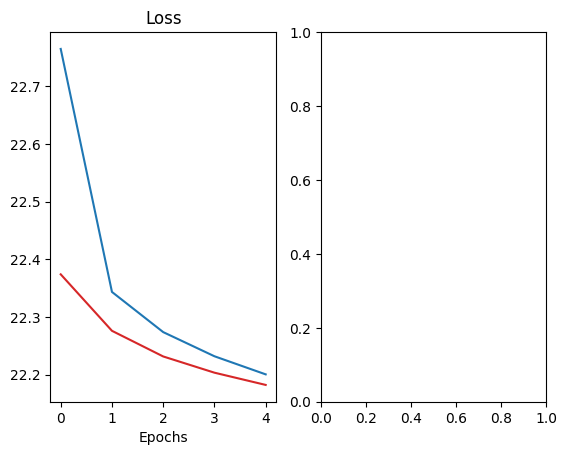

In [19]:
fig, axs = plt.subplots(1, 2)

axs[0].plot(loss_data, color='tab:blue', label="Training Loss")
axs[0].plot(val_loss_data, color='tab:red', label="Validation Loss")
axs[0].set_title("Loss")
axs[0].set_xlabel("Epochs")
fig.show()

In [20]:
y_pred = clf.predict(X_test)

1390/1390 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [21]:
y_proba = clf.predict_proba(X_test)

1390/1390 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [22]:
targets_preprocessor.inverse_transform(y_test)

AttributeError: 'TargetOneHotEncoder' object has no attribute 'encoder'

In [ ]:
from sklearn.metrics import accuracy_score, top_k_accuracy_score

In [ ]:
print("Accuracy")
print(f"{accuracy_score(y_test, y_pred):.2%}")
print("Top 5 Accuracy")
print(f"{top_k_accuracy_score(y_test, y_proba, k=5):.2%}")
print("Top 10 Accuracy")
print(f"{top_k_accuracy_score(y_test, y_proba, k=10):.2%}")
print("Top 15 Accuracy")
print(f"{top_k_accuracy_score(y_test, y_proba, k=15):.2%}")
print("Top 20 Accuracy")
print(f"{top_k_accuracy_score(y_test, y_proba, k=20):.2%}")
print("Top 25 Accuracy")
print(f"{top_k_accuracy_score(y_test, y_proba, k=25):.2%}")

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))